In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml
import cfgrib


In [2]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [3]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
pangu6 = f"{pangu_dir}/out-pangu-6.grib"
fcn0 = f"{fcn_dir}/out-fcn-0.grib"

In [4]:
def extract_temp_level500_new(dataset):
    ds = cfgrib.open_datasets(dataset)
    ds_temp = next(var for var in ds if 't' in var.data_vars)['t']
    ds_temp_500 = ds_temp.sel(isobaricInhPa='500')
    return ds_temp_500

In [5]:
pangu_df = extract_temp_level500_new(pangu0)
for i in range(6, 50, 6):
    pangu_df_temp = extract_temp_level500_new(f"{pangu_dir}/out-pangu-{i}.grib")
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all.nc")

In [6]:
fcn_df = extract_temp_level500_new(fcn0)
for i in range(6, 50, 6):
    fcn_df_temp = extract_temp_level500_new(f"{fcn_dir}/out-FCN-{i}.grib")
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

In [7]:
pangu_df

<xarray.DataArray 't' (step: 9, latitude: 721, longitude: 1440)> Size: 37MB
array([[[234.09976, 234.09976, 234.09976, ..., 234.09976, 234.09976,
         234.09976],
        [233.87418, 233.87515, 233.8771 , ..., 233.8693 , 233.87125,
         233.87222],
        [233.71011, 233.71207, 233.715  , ..., 233.7023 , 233.70425,
         233.70718],
        ...,
        [235.9689 , 235.96988, 235.97086, ..., 235.96695, 235.96793,
         235.9689 ],
        [235.6984 , 235.69937, 235.69937, ..., 235.69644, 235.69742,
         235.69742],
        [235.3605 , 235.3605 , 235.3605 , ..., 235.3605 , 235.3605 ,
         235.3605 ]],

       [[235.58984, 235.59766, 235.63184, ..., 235.50684, 235.56445,
         235.58984],
        [235.54785, 235.51367, 235.53613, ..., 235.41797, 235.46777,
         235.49219],
        [235.46875, 235.41309, 235.3877 , ..., 235.33105, 235.33398,
         235.35254],
...
        [237.72755, 237.72365, 237.69923, ..., 237.63576, 237.63673,
         237.63673],
        [237.65724, 237.66115, 237.63478, ..., 237.57716, 237.57912,
         237.59084],
        [256.95996, 256.51172, 256.1797 , ..., 257.29492, 256.89062,
         256.4707 ]],

       [[232.7717 , 232.78537, 232.79709, ..., 232.61154, 232.57932,
         232.54709],
        [232.70724, 232.73264, 232.75021, ..., 232.55685, 232.53635,
         232.4963 ],
        [232.65451, 232.67502, 232.69357, ..., 232.50314, 232.4885 ,
         232.44943],
        ...,
        [237.85373, 237.86642, 237.86057, ..., 238.0881 , 238.05685,
         238.051  ],
        [237.7922 , 237.78635, 237.76389, ..., 238.00314, 237.96408,
         238.009  ],
        [250.83713, 250.38986, 250.28342, ..., 250.8215 , 250.64474,
         250.62424]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:0...
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     (step) datetime64[ns] 72B 2022-01-01 ... 2022-01-03
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

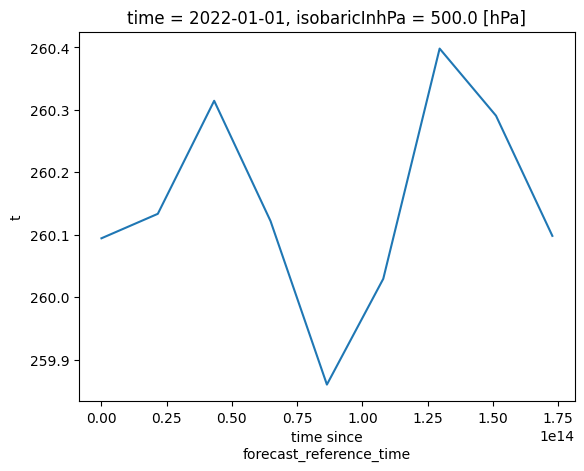

In [8]:
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0


indian_region = pangu_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)
indian_region.mean(dim=['latitude', 'longitude']).plot()

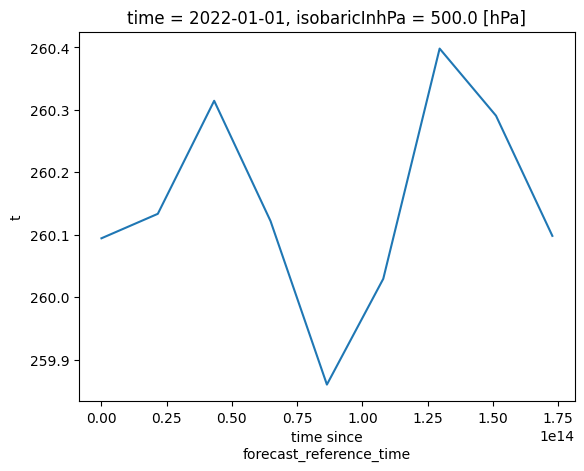

In [9]:
def graph_india(dataset):
    # this will plot the average temperature over India for each forecast step
    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )
    indian_region.mean(dim=['latitude', 'longitude']).plot()

graph_india(pangu_df)



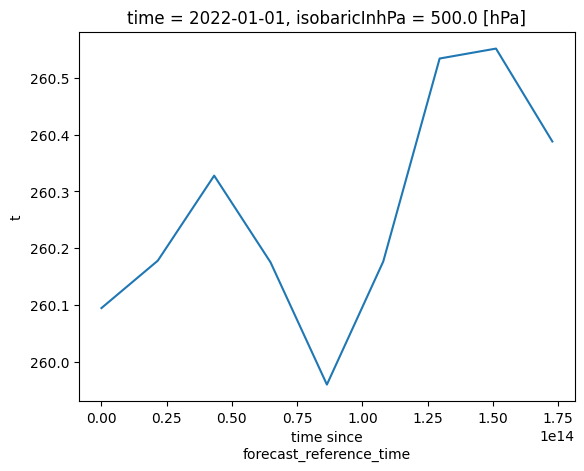

In [10]:
graph_india(fcn_df)

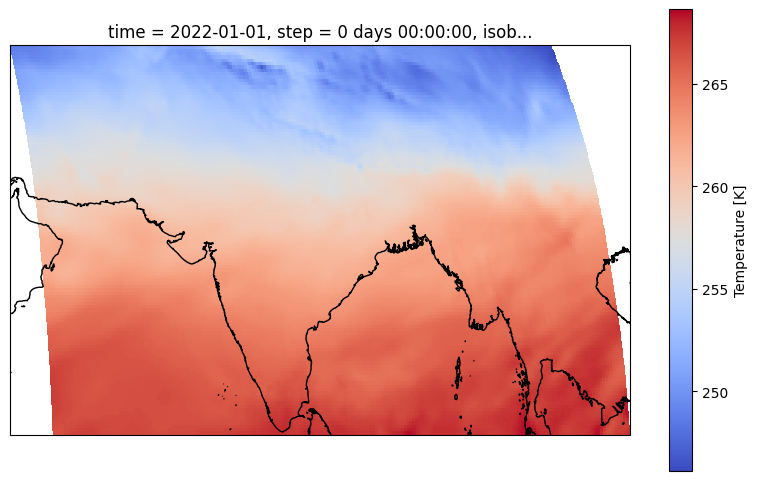

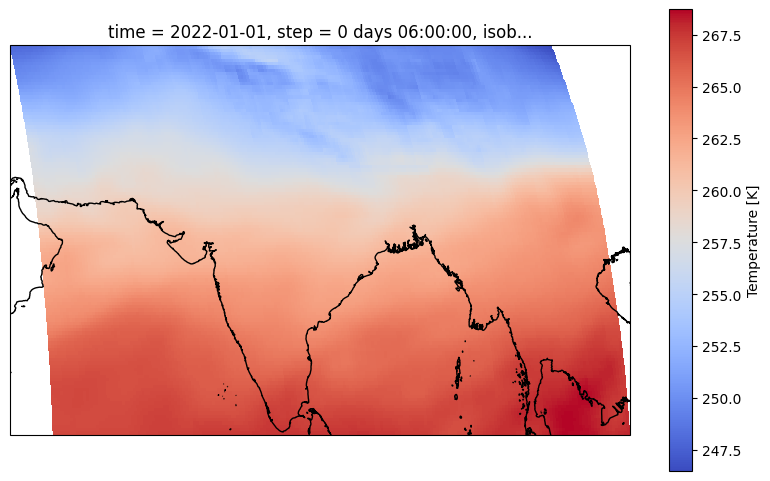

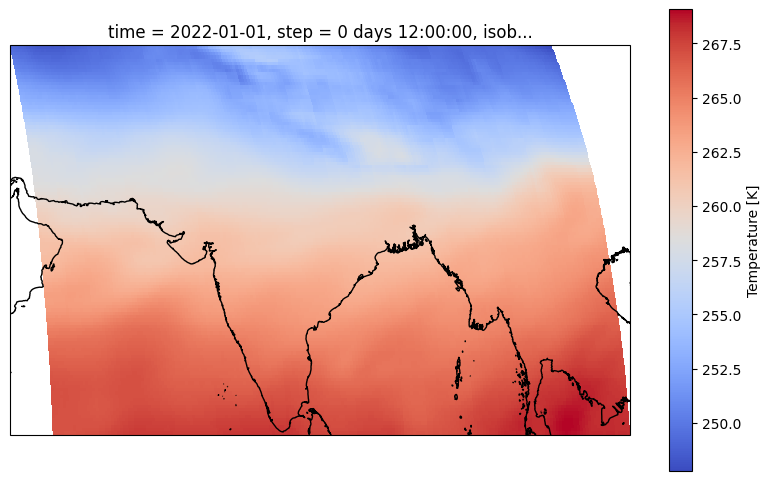

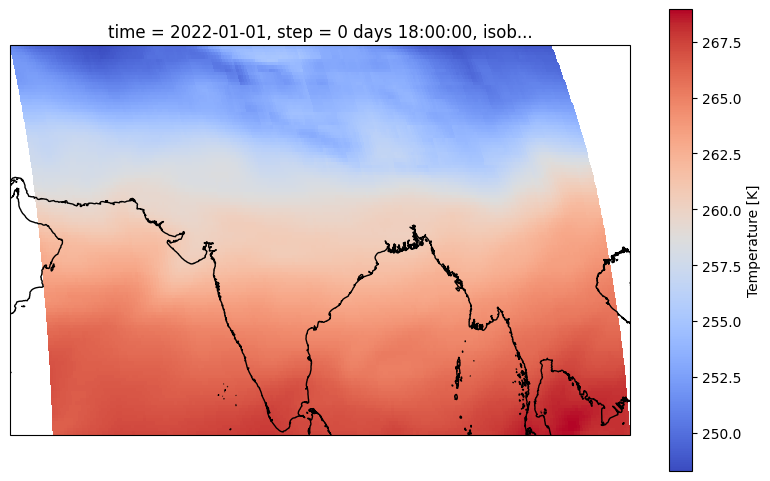

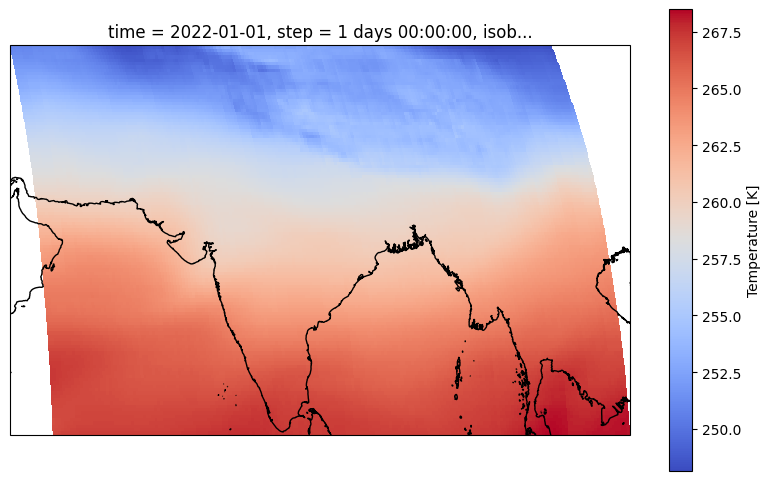

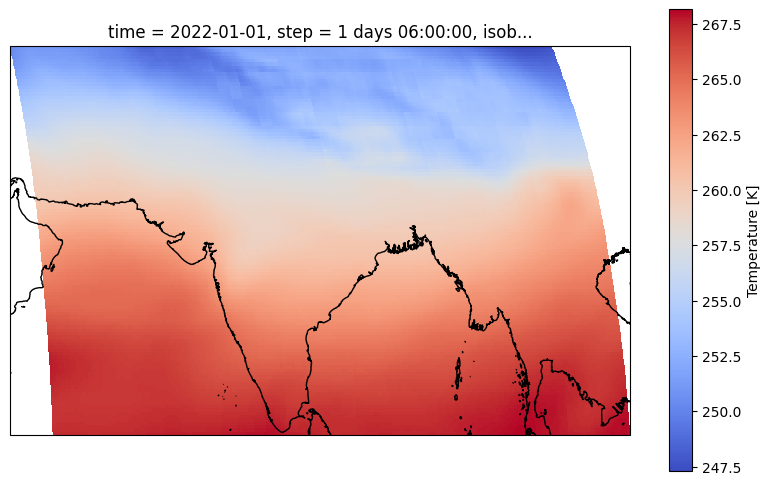

In [11]:
import cartopy
import cartopy.crs as ccrs


def map_india(dataset):
    # Define the bounding box for the Indian region
    lat_min, lat_max = 8.0, 37.0
    lon_min, lon_max = 58.0, 107.0

    # Select data over the Indian region
    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )

    # Plot the map of India for each forecast step
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution="10m")
    plot = indian_region.plot(
        cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
    )

for i in range(0,6):
    map_india(pangu_df.isel(step=i))


In [12]:
era5_12 = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/my_graphcast_dir/data/gcp_data/dataset_source-era5_date-2022-01-01_res-0.25_levels-13_steps-12.nc'


In [13]:
# read nc file to xarray
ds_era5 = xr.open_dataset(era5_12)
ds_era5_temp_level500 = ds_era5['temperature'].sel(level=500)
ds_era5_temp_level500

<xarray.DataArray 'temperature' (batch: 1, time: 14, lat: 721, lon: 1440)> Size: 58MB
[14535360 values with dtype=float32]
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) timedelta64[ns] 112B 0 days 00:00:00 ... 3 days 06:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 112B ...
Dimensions without coordinates: batch

In [14]:
# drop the elements that have a time greater than 151200000000000. keep in mind that time is in timedelta format so needs to be compare accordingly
ds_era5_temp_level500 = ds_era5_temp_level500.where(ds_era5_temp_level500.time < np.timedelta64(194400000000000, 'ns'), drop=True)
ds_era5_temp_level500

<xarray.DataArray 'temperature' (batch: 1, time: 9, lat: 721, lon: 1440)> Size: 37MB
array([[[[235.36021, 235.36021, 235.36021, ..., 235.36021, 235.36021,
          235.36021],
         [235.69865, 235.69945, 235.69945, ..., 235.69627, 235.69707,
          235.69707],
         [235.96909, 235.96988, 235.97067, ..., 235.96672, 235.96829,
          235.96909],
         ...,
         [233.70992, 233.71228, 233.71466, ..., 233.702  , 233.70438,
          233.70753],
         [233.87439, 233.87518, 233.87675, ..., 233.86964, 233.87123,
          233.87201],
         [234.09975, 234.09975, 234.09975, ..., 234.09975, 234.09975,
          234.09975]],

        [[236.1383 , 236.1383 , 236.1383 , ..., 236.1383 , 236.1383 ,
          236.1383 ],
         [236.33679, 236.33679, 236.33679, ..., 236.33679, 236.33679,
          236.33679],
         [236.44116, 236.44116, 236.44116, ..., 236.44116, 236.44116,
          236.44116],
...
         [234.75603, 234.7553 , 234.75456, ..., 234.75896, 234.75822,
          234.75749],
         [234.74286, 234.74286, 234.7414 , ..., 234.74431, 234.74359,
          234.74359],
         [234.73846, 234.73846, 234.73846, ..., 234.73846, 234.73846,
          234.73846]],

        [[237.81917, 237.81917, 237.81917, ..., 237.81917, 237.81917,
          237.81917],
         [237.86804, 237.86804, 237.86877, ..., 237.86584, 237.86658,
          237.86658],
         [237.99934, 238.00081, 238.00153, ..., 237.99643, 237.99788,
          237.99861],
         ...,
         [232.92435, 232.92216, 232.9207 , ..., 232.93092, 232.92946,
          232.92654],
         [232.99   , 232.98854, 232.98782, ..., 232.99365, 232.99292,
          232.99147],
         [233.0739 , 233.0739 , 233.0739 , ..., 233.0739 , 233.0739 ,
          233.0739 ]]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 72B ...
Dimensions without coordinates: batch

In [15]:
# get the data for bounds over India
indian_region_pangu = pangu_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

indian_region_pangu

<xarray.DataArray 't' (step: 9, latitude: 117, longitude: 117)> Size: 493kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.47656, 250.58594, 250.70117, ..., 249.51953, 249.52246,
         249.60254],
        [250.6416 , 250.73242, 250.84082, ..., 249.62598, 249.61328,
         249.65137],
        [250.78809, 250.87598, 250.95117, ..., 249.71973, 249.69922,
         249.69824],
...
        [267.39746, 267.38672, 267.3789 , ..., 267.72168, 267.73438,
         267.77344],
        [267.43262, 267.4209 , 267.41016, ..., 267.74902, 267.76367,
         267.81152],
        [267.50586, 267.4961 , 267.4912 , ..., 267.78906, 267.83203,
         267.8457 ]],

       [[253.0217 , 252.92014, 252.7883 , ..., 250.06564, 250.07443,
         250.25705],
        [253.26584, 253.16525, 253.05002, ..., 250.31857, 250.31369,
         250.51096],
        [253.53244, 253.43283, 253.3215 , ..., 250.54514, 250.54318,
         250.75705],
        ...,
        [267.01584, 267.0256 , 267.03537, ..., 267.7678 , 267.80783,
         267.89084],
        [267.0168 , 267.0295 , 267.03928, ..., 267.87228, 267.91428,
         267.98654],
        [267.01974, 267.02365, 267.02463, ..., 268.02658, 268.0764 ,
         268.11838]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:0...
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     (step) datetime64[ns] 72B 2022-01-01 ... 2022-01-03
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [16]:
# get the data for bounds over India
indian_region_era5 = ds_era5_temp_level500.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)
indian_region_era5

<xarray.DataArray 'temperature' (batch: 1, time: 9, lat: 117, lon: 117)> Size: 493kB
array([[[[266.69214, 266.71902, 266.7475 , ..., 267.54932, 267.65134,
          267.7549 ],
         [266.6447 , 266.66922, 266.69138, ..., 267.5604 , 267.64502,
          267.72568],
         [266.60754, 266.62415, 266.64154, ..., 267.57465, 267.62918,
          267.6798 ],
         ...,
         [252.01343, 252.11465, 252.26884, ..., 250.03813, 250.02232,
          249.95352],
         [251.845  , 252.02135, 252.27438, ..., 249.99069, 249.94482,
          249.85152],
         [251.71295, 251.96678, 252.25383, ..., 249.85864, 249.77956,
          249.6728 ]],

        [[266.96735, 267.04086, 267.13736, ..., 267.4932 , 267.5501 ,
          267.65134],
         [266.912  , 266.94916, 267.02347, ..., 267.494  , 267.60706,
          267.74228],
         [266.9096 , 266.90723, 266.93097, ..., 267.49792, 267.63474,
          267.77707],
...
         [252.53973, 252.3604 , 252.17155, ..., 252.427  , 252.50752,
          252.53827],
         [252.10641, 252.01126, 251.88316, ..., 252.06468, 252.09396,
          252.12251],
         [251.7236 , 251.68114, 251.64088, ..., 251.65479, 251.67894,
          251.74483]],

        [[266.65988, 266.67084, 266.67227, ..., 267.61987, 267.6899 ,
          267.8161 ],
         [266.67227, 266.6774 , 266.66864, ..., 267.48566, 267.59436,
          267.75336],
         [266.70438, 266.7029 , 266.68616, ..., 267.41855, 267.5564 ,
          267.71545],
         ...,
         [254.67963, 254.58917, 254.48851, ..., 250.74846, 250.73022,
          250.70543],
         [254.30687, 254.20692, 254.10115, ..., 250.39029, 250.38081,
          250.39249],
         [254.04353, 253.95671, 253.8699 , ..., 250.11746, 250.16196,
          250.23273]]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 468B 68.0 68.25 68.5 68.75 ... 96.25 96.5 96.75 97.0
  * lat       (lat) float32 468B 8.0 8.25 8.5 8.75 9.0 ... 36.25 36.5 36.75 37.0
  * time      (time) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 72B ...
Dimensions without coordinates: batch

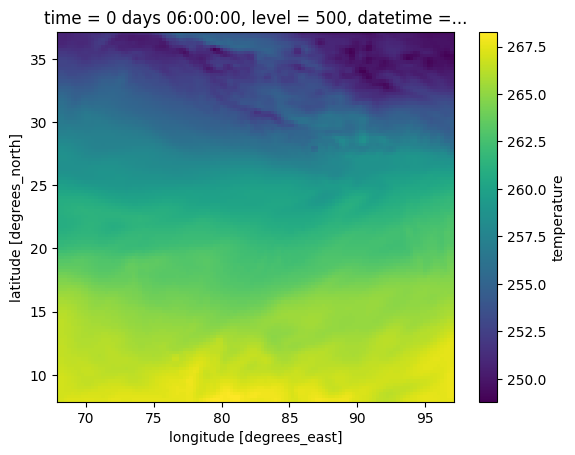

In [17]:
indian_region_era5.sel(time='21600000000000').plot()

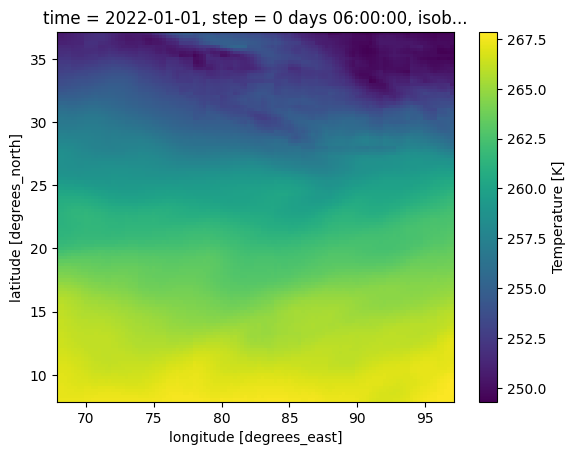

In [18]:
indian_region_pangu.sel(step='21600000000000').plot()

In [19]:
indian_region_pangu.sel(step='21600000000000')

<xarray.DataArray 't' (latitude: 117, longitude: 117)> Size: 55kB
array([[250.47656, 250.58594, 250.70117, ..., 249.51953, 249.52246,
        249.60254],
       [250.6416 , 250.73242, 250.84082, ..., 249.62598, 249.61328,
        249.65137],
       [250.78809, 250.87598, 250.95117, ..., 249.71973, 249.69922,
        249.69824],
       ...,
       [267.18066, 267.15625, 267.12988, ..., 267.72363, 267.7461 ,
        267.81348],
       [267.19434, 267.1748 , 267.15625, ..., 267.72168, 267.71777,
        267.76172],
       [267.21484, 267.21094, 267.21094, ..., 267.75977, 267.7461 ,
        267.7334 ]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
    step           timedelta64[ns] 8B 06:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     datetime64[ns] 8B 2022-01-01T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [ ]:
from tqdm import tqdm:
for i in tqdm(range(0, 172800000000000,21600000000000)):
    

In [172]:
# write code that finds the difference between the era5 dataset and the forecast data at various time steps and plots the information
print(indian_region_pangu)
# print(fcn_df)
print(indian_region_era5)


<xarray.DataArray 't' (step: 9, latitude: 117, longitude: 117)> Size: 493kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.47656, 250.58594, 250.70117, ..., 249.51953, 249.52246,
         249.60254],
        [250.6416 , 250.73242, 250.84082, ..., 249.62598, 249.61328,
         249.65137],
        [250.78809, 250.87598, 250.95117, ..., 249.71973, 249.69922,
         249.69824],
...
        [267.39746, 267.38672, 267.3789 , ..., 267.72168, 267.73438,
         267.77344],
     

In [ ]:
forecast_flipped = indian_region_pangu.sel(latitude=indian_region_pangu.latitude[::-1])
forecast_flipped = forecast_flipped.rename({'latitude': 'lat', 'longitude': 'lon'})
forecast_step1 = forecast_flipped.sel(step='21600000000000')
india_era5_step1 = indian_region_era5.sel(time='21600000000000')
diff = xr.Dataset({"difference": india_era5_step1 - forecast_step1})
diff.difference.plot()

<xarray.Dataset> Size: 56kB
Dimensions:        (lon: 117, lat: 117, batch: 1)
Coordinates:
  * lon            (lon) float32 468B 68.0 68.25 68.5 68.75 ... 96.5 96.75 97.0
  * lat            (lat) float32 468B 8.0 8.25 8.5 8.75 ... 36.5 36.75 37.0
    level          int32 4B 500
    datetime       (batch) datetime64[ns] 8B ...
    step           timedelta64[ns] 8B 06:00:00
    isobaricInhPa  float64 8B 500.0
    valid_time     datetime64[ns] 8B 2022-01-01T06:00:00
Dimensions without coordinates: batch
Data variables:
    difference     (batch, lat, lon) float32 55kB -0.2475 -0.1701 ... -0.07127

In [ ]:
# import xarray as xr
# import matplotlib.pyplot as plt

# # Assuming forecast and ground_truth are loaded as xarray.DataArray objects
# # Flip the latitude of the forecast dataset to match the ground truth orientation
# forecast_flipped = indian_region_pangu.sel(latitude=forecast1.latitude[::-1])

# # Align dimensions (e.g., rename latitude and longitude if needed)
# forecast_flipped = forecast_flipped.rename({'latitude': 'lat', 'longitude': 'lon'})

# # Compute the difference and store in a new xarray dataset
# diff = xr.Dataset({"difference": indian_region_era5 - indian_region_pangu})
# diff

Text(0.5, 1.0, 'Forecast Temp Diff')

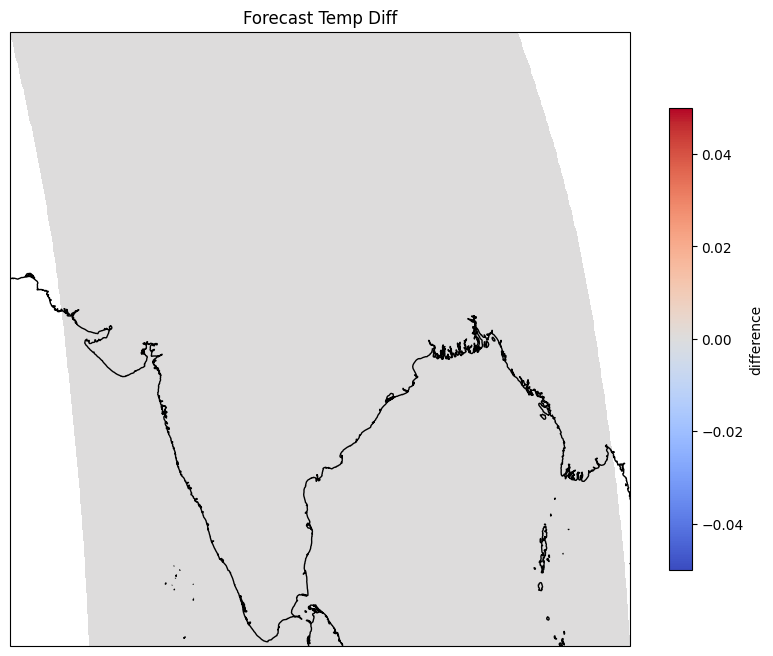

In [176]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
diff0 = diff.sel(time='129600000000000')
var = diff0['difference']
plot = var.plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)
plt.title("Forecast Temp Diff")

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

# Select a slice of the dataset to plot
diff0 = diff.sel(step=timestep, time=timestep)
var = diff0['difference']

# Calculate mean and standard deviation of the data
mean = var.mean().item()
std_dev = var.std().item()

# Define a custom normalization function
def custom_cmap_norm(data, mean, std_dev):
    norm_data = np.clip((data - mean) / std_dev, -1, 1)  # Normalize within [-1, 1]
    return norm_data

# Apply the custom normalization
norm_var = custom_cmap_norm(var, mean, std_dev)

# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")

plot = var.plot(
    cmap=plt.cm.coolwarm,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"shrink": 0.6},
    norm=plt.Normalize(vmin=-0.003, vmax=0.003)  # Adjust colormap to focus around mean
)

plt.title("Forecast Temp Diff")
plt.show()


NameError: name 'timestep' is not defined

In [ ]:
def plot_difference(forecast, ground_truth, timestep):
    forecast_flipped = forecast.sel(latitude=forecast.latitude[::-1])

    # Align dimensions (e.g., rename latitude and longitude if needed)
    forecast_flipped = forecast_flipped.rename({'latitude': 'lat', 'longitude': 'lon'})

    # Compute the difference and store in a new xarray dataset
    diff = xr.Dataset({"difference": forecast_flipped - ground_truth.isel(batch=0)})


    # Select a slice of the dataset to plot
    diff0 = diff.sel(step=timestep, time=timestep)
    var = diff0['difference']

    # Calculate mean and standard deviation of the data
    mean = var.mean().item()
    std_dev = var.std().item()

    # Define a custom normalization function
    def custom_cmap_norm(data, mean, std_dev):
        norm_data = np.clip((data - mean) / std_dev, -1, 1)  # Normalize within [-1, 1]
        return norm_data

    # Apply the custom normalization
    norm_var = custom_cmap_norm(var, mean, std_dev)

    # Plot the data
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution="10m")

    plot = var.plot(
        cmap=plt.cm.coolwarm,
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"shrink": 0.6},
        norm=plt.Normalize(vmin=-0.003, vmax=0.003)  # Adjust colormap to focus around mean
    )

    plt.title("Forecast Temp Diff")
    plt.show()

        

In [ ]:

# Plot the difference for a specific timestep
step_to_plot = 0
plt.figure(figsize=(10, 6))
diff["difference"].isel(step=step_to_plot).plot()
plt.title(f"Difference at step {step_to_plot}")
plt.show()

In [ ]:
# Load the data
forecast1 = indian_region_pangu
ground_truth = indian_region_era5

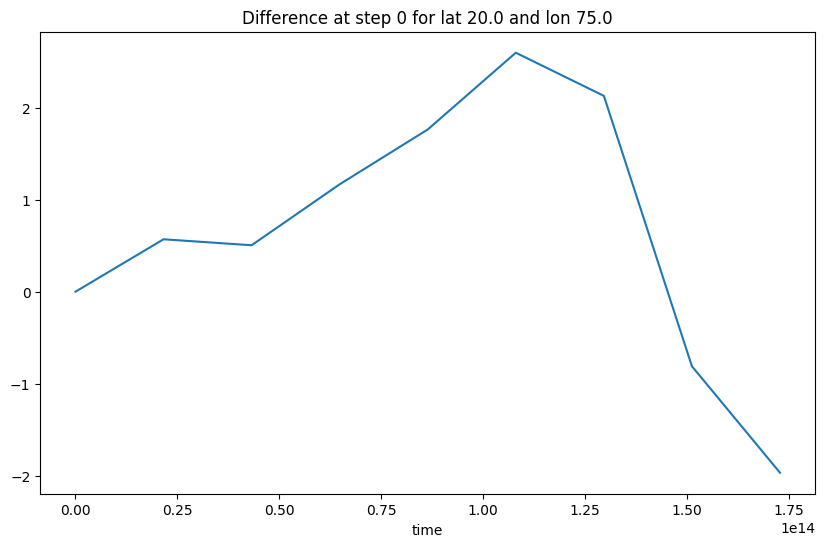

In [ ]:
import matplotlib.pyplot as plt

# Define the specific latitude and longitude
specific_lat = 20.0
specific_lon = 75.0

# Select the specific latitude and longitude from both datasets
forecast_specific = forecast1.sel(latitude=specific_lat, longitude=specific_lon, method='nearest')
ground_truth_specific = ground_truth.sel(lat=specific_lat, lon=specific_lon, method='nearest')

# Compute the difference
diff_specific = forecast_specific - ground_truth_specific.isel(batch=0)

# Plot the difference for a specific timestep
step_to_plot = 0
plt.figure(figsize=(10, 6))
diff_specific.isel(step=step_to_plot).plot()
plt.title(f"Difference at step {step_to_plot} for lat {specific_lat} and lon {specific_lon}")
plt.show()

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming forecast and ground_truth are loaded as xarray.DataArray objects
# Flip the latitude of the forecast dataset to match the ground truth orientation
forecast_flipped = forecast1.sel(latitude=forecast.latitude[::-1])

# Compute the difference
# Align dimensions (e.g., rename latitude and longitude if needed)
forecast_flipped = forecast_flipped.rename({'latitude': 'lat', 'longitude': 'lon'})
diff = forecast_flipped - ground_truth.isel(batch=0)

# Plot the difference for a specific timestep
step_to_plot = 0
plt.figure(figsize=(10, 6))
diff.isel(step=step_to_plot).plot(cmap="coolwarm")
plt.title(f"Difference at step {step_to_plot}")
plt.show()

In [ ]:
  #Select data for this timestep
timesteps = [i for i in range(0, 172800000000000,21600000000000 )]
print(timesteps)
forecast_step = forecast_temps.sel(step = '21600000000000')
ground_truth_step = ground_truth_temps.sel(time='21600000000000')
ground_truth_step
temp_diff = 
temp_diff

SyntaxError: invalid syntax (1836825255.py, line 7)

In [ ]:

# Calculate temperature difference
temp_diff = forecast_step - ground_truth_step

# Plot difference
im = axs[i].imshow(temp_diff, 
                    cmap='RdBu_r',  # Red-Blue diverging colormap
                    origin='lower',  # Align with lat/lon orientation
                    extent=[0, 360, -90, 90])
axs[i].set_title(f'Temp Diff at {time_step}')
axs[i].set_xlabel('Longitude')
axs[i].set_ylabel('Latitude')
plt.colorbar(im, ax=axs[i], label='Temperature Difference (K)')

In [ ]:


# for i, time_step in enumerate(time_steps):
#     # Select data for this timestep
#     forecast_step = forecast_temps.sel(step=np.timedelta64(int(time_step), 's'))
#     ground_truth_step = ground_truth_temps.sel(time=time_step)
    
#     # Calculate temperature difference
#     temp_diff = forecast_step - ground_truth_step
    
#     # Plot difference
#     im = axs[i].imshow(temp_diff, 
#                         cmap='RdBu_r',  # Red-Blue diverging colormap
#                         origin='lower',  # Align with lat/lon orientation
#                         extent=[0, 360, -90, 90])
#     axs[i].set_title(f'Temp Diff at {time_step}')
#     axs[i].set_xlabel('Longitude')
#     axs[i].set_ylabel('Latitude')
#     plt.colorbar(im, ax=axs[i], label='Temperature Difference (K)')

# # Remove any unused subplots
# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Temperature Differences (Forecast - Ground Truth)', fontsize=16)
plt.show()
